<img src='https://cdn.wbez.org/image/f4d19da9e8d1baf914e6eb8e57beb0ce'>
<h1><center> Chicago Police Schedule Recommendation </center></h1>

## 1. DEFINE

We want to look at recent crime data from Chicago metropolitian area and recommend police scheduling to reduce life threating crimes (assault,murders etc) in neighborhoods with high crimes rates or neighborhood with high murder rates.

The crime data is from 2019 and collected is from [City of Chicago site](https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie)

The recommendation will help predict heinous crimes based on several factors in different Chicago neighborhoods and help schedule Chicago police department staff officers so the chances of crimes are reduced.

In [48]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

## 2. DISCOVER DATA

In [3]:
data = pd.read_csv('ChicagoCrime_2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190722 entries, 0 to 190721
Data columns (total 30 columns):
ID                            190722 non-null int64
Case Number                   190722 non-null object
Date                          190722 non-null object
Block                         190722 non-null object
IUCR                          190722 non-null object
Primary Type                  190722 non-null object
Description                   190722 non-null object
Location Description          190041 non-null object
Arrest                        190722 non-null bool
Domestic                      190722 non-null bool
Beat                          190722 non-null int64
District                      190722 non-null int64
Ward                          190714 non-null float64
Community Area                190720 non-null float64
FBI Code                      190722 non-null object
X Coordinate                  189603 non-null float64
Y Coordinate                  189603 non-null

In [4]:
# View the first five rows
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11839986,JC447394,09/24/2019 11:45:00 PM,002XX W 83RD ST,031A,ROBBERY,ARMED: HANDGUN,ATM (AUTOMATIC TELLER MACHINE),False,False,...,-87.630906,"(41.74355527, -87.630905732)",18.0,21554.0,40.0,1.0,13.0,59.0,20.0,236.0
1,11839904,JC447322,09/24/2019 11:43:00 PM,062XX S ARTESIAN AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,...,-87.684888,"(41.780294987, -87.684888472)",44.0,21867.0,64.0,111.0,2.0,58.0,13.0,274.0
2,11839889,JC447333,09/24/2019 11:38:00 PM,115XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,-87.642147,"(41.684809877, -87.642147208)",45.0,22212.0,50.0,642.0,22.0,13.0,10.0,220.0
3,11839984,JC447321,09/24/2019 11:32:00 PM,048XX S SEELEY AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,-87.675835,"(41.805886147, -87.675834977)",29.0,14924.0,59.0,788.0,3.0,37.0,23.0,119.0
4,11840468,JC447973,09/24/2019 11:30:00 PM,022XX W WELLINGTON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.684116,"(41.935859796, -87.684116209)",24.0,21538.0,46.0,110.0,40.0,39.0,5.0,172.0


### Exploratory Data Analysis

In [5]:
data.astype('object').describe().transpose()

,count,unique,top,freq
ID,190722,190722,11796479,1
Case Number,190722,190706,JC438604,3
Date,190722,93251,01/01/2019 12:00:00 AM,56
Block,190722,26025,001XX N STATE ST,753
IUCR,190722,312,0486,17724
Primary Type,190722,31,THEFT,45264
Description,190722,291,SIMPLE,22973
Location Description,190041,122,STREET,42214
Arrest,190722,2,False,150433
Domestic,190722,2,False,158583


At a glance, we can see that:
* There were 56 crimes that happened on midnight of Jan 1. 
* 753 crimes were reported from Block of 001XX N STATE ST 
* 160K crimes were domestic out of 190K entries
* Location (41.883500187, -87.627876698) had 331 crimes reported. This is the heart of Chicago downtown

**Removing columns that are not used**
* ID, Case Number are unique
* Year is always 2019
* X Coordinate and Y Coordinate, Location are similar as other column Latitude Longitude
* Updated On might not be helpful to use

In [6]:
#Removing Columns that are not used
cols = ['ID','Case Number','Year','Updated On', 'X Coordinate', 'Y Coordinate'
        , 'Location', 'Historical Wards 2003-2015', 'Census Tracts','Boundaries - ZIP Codes','Wards', 'Community Areas'
        , 'Police Beats', 'Police Districts']
data2=data.drop(cols,axis=1)

In [7]:
##Seeing Null Values
data2.isnull().sum()

Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     681
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       8
Community Area             2
FBI Code                   0
Latitude                1119
Longitude               1119
Zip Codes               1119
dtype: int64

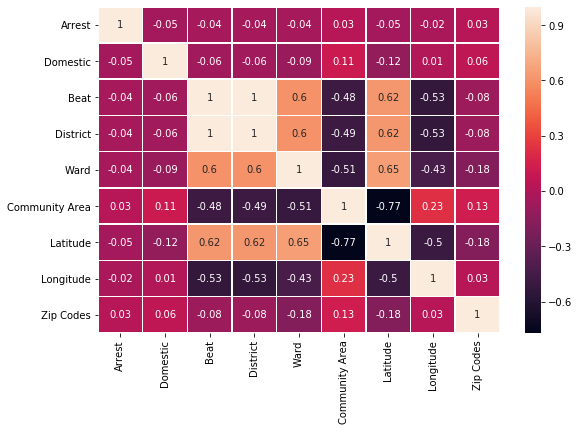

In [8]:
corr = data2.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(round(corr,2), annot =True,linewidths=.5, ax=ax)

**Arrests in 2019:**

There are *40,289* aressts in 2019.

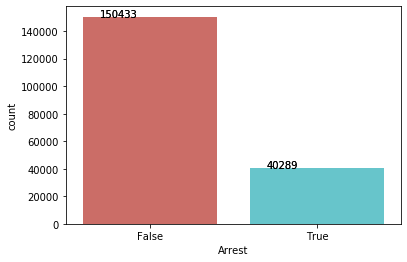

In [9]:
sns.countplot(x='Arrest',data=data2, palette='hls')
arrests = sns.countplot(x="Arrest", data=data2, palette='hls')

for p in arrests.patches:
        arrests.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

**Arrests vs Domestic/Non Domestic**

Out of *40,289* arrests more than 90% of them are non-domestic and rest is domestic

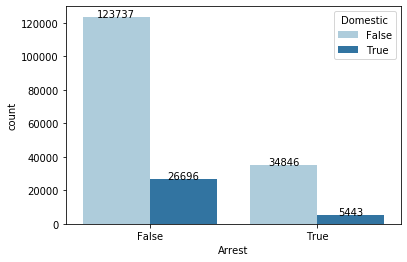

In [10]:
arrests_domestic = sns.countplot(x="Arrest", hue="Domestic", data=data2, palette='Paired')
for p in arrests_domestic.patches:
    arrests_domestic.text(p.get_x()+p.get_width()/2.,
             p.get_height()+3,
            '{:d}'.format(p.get_height()),
            ha="center") 

**Districts with most crimes:**

District 11, 6, 8, 1, 18, 4, 7, 12 have highest crime rates

In [78]:
districts_highcrime = data2['District'].value_counts().head().index
districts_highcrime

Int64Index([11, 6, 8, 1, 18], dtype='int64')

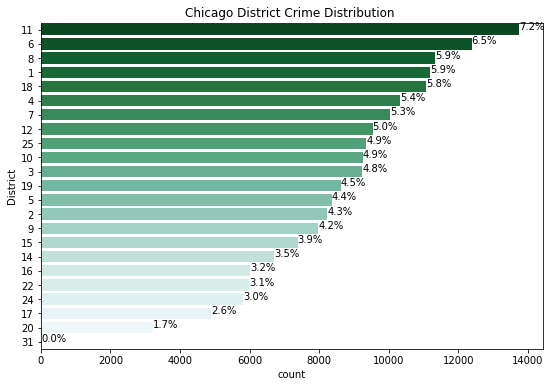

In [80]:
plt.subplots(figsize=(9, 6))
district_crimes_plot = sns.countplot(y="District", data=data2,
            order=data2['District'].value_counts().index,palette='BuGn_r')
total = len(data2['District'])
for p in district_crimes_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        district_crimes_plot.annotate(percentage, (x, y))
district_crimes_plot.set_title('Chicago District Crime Distribution ')
plt.show()

**Finding Aggravated Crimes:**
The goal of this project is to predict and potentially reduce heinous crimes that causes bodily/life harm.
List of crime types can be reference in this website: http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
The crime type are displayed as codes in the field called FBI_CODE in the dataset.

In [81]:
for x in sorted(data2['FBI Code'].unique()):
    print (x, end=' '),

01A 01B 02 03 04A 04B 05 06 07 08A 08B 09 10 11 12 13 14 15 16 17 18 19 20 22 24 26 

Few FBI codes that corresponds to aggravated crimes are:
* 01A : Homicide 1st and 2nd Degree
* 01B : Involuntary Manslaughter
* 02   : Criminal Sexual Assault
* 04A : Aggravated Assault
* 04B : Aggravated Battery
* 08A : Simple Assault
* 08B : Simple Battery

Above crime types could lead to death or bodiy harm of human beings. The goal of police department has been to reduce such kind of crimes.

In [82]:
fbi_code_aggravated = ['01A','01B','02','04A','04B','08A','08B']

* Use Cluster analysis to find which district has more of such crimes
* Use logistic regression  to predict if aggravated crimes will occur or not. 
* For logistic, Create another field called Aggravated and train the model. Use other factors like date and time
* Use decision tree/ random forest
* Use time series Analysis

There  are more occurance of theft (fbi_code =06) in all districts. 
http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
District 1,6,10,11,12 had most crimes in Chicago. Among all incidents in district 11, drug abuse (fbi_code=18) was the highest followed by bodily harm (fbi_code=08B). Most crime in district 10 was bodily harm. 
Police departments accross Chicago has been fighting to reduce all kinds of crime. But their main goal is to reduce homicide, assault and battery and criminal sexual abuse. 
Based on this goal. The goal is to predict above crimes and assist police departments in respective districts to deploy police for standby
https://www.govtech.com/public-safety/Chicago-Police-Cut-Crime-with-Major-Upgrades-to-Analytics-and-Field-Technology.html



**Cluster Analysis of Crime Type vs Districts**

Let focus on top 5 crime districts and getting aggravated crimes:

In [83]:
# Getting Aggravated crimes in top 5 crime districts
crime = data2[['FBI Code', 'District']]
district_crime = crime[(crime['District'].isin(districts_highcrime)) & (crime['FBI Code'].isin(fbi_code_aggravated))]
district_crime.head()

,FBI Code,District
1,04A,8
6,08B,8
9,08B,6
10,08B,1
15,04A,8


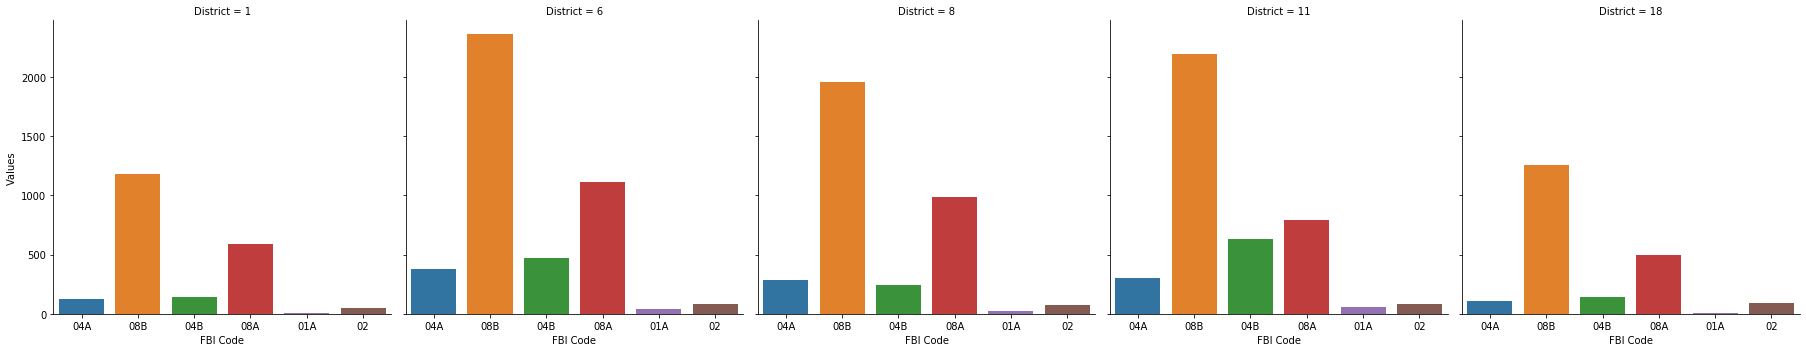

In [94]:
fig=sns.catplot(col="District", x="FBI Code", data=district_crime, kind="count",col_wrap=5);
fig.set_axis_labels('FBI Code', 'Values')

* District 6 has the highest cases of
    * 04A -Aggravate battery,
    * 08B - Simple Battery and
    * highest 08A - Simple Assault 
    
    
* District 11 (highest crime district 2019) has the highest cases of 
    * 04B Aggravated Batter 
    * 01A Homicide 1st and 2nd degree
    
    
* District 11 and 18 has high cases of
    * 02 Criminal Sexual Assault